<h1 id="Project:-Euro-Soccer-Database-Analysis">Project: Euro Soccer Database Analysis<a class="anchor-link" href="#Project:-Euro-Soccer-Database-Analysis">¶</a></h1><h2 id="Table-of-Contents">Table of Contents<a class="anchor-link" href="#Table-of-Contents">¶</a></h2><ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<p><a id="intro"></a></p>
<h2 id="Introduction">Introduction<a class="anchor-link" href="#Introduction">¶</a></h2><p>As a Soccer fan, I have decided to take up the Euro Soccer Database for analysis. I have used DB Browser for SQLite to extract the datasets from the Database. Following are the questions that I have come up for analysis. I have divided the questions or research analysis set into two groups, one related to Players and one to Teams:</p><p></p><p>On Players:</p>
<ol>
<li>Which player has the most penalties? </li>
<li>Attributes of better players than average?</li>
<li>Age and Overall Rating relationship analysis.</li>
</ol>
<p></p><p>On Teams:</p>
<ol>
<li>Which team improved the most over the time period? </li>
<li>Home and Away Games - winning and losing ratio analysis.</li>
</ol>


<h3 id="SQL-Queries-Used:">SQL Queries Used:<a class="anchor-link" href="#SQL-Queries-Used:">¶</a></h3><p>Following SQL Queries are used to combine the tables mentioned in the section above.</p>
<ol>
<li><p>For players dataset: I needed the player's name and birthday from Player table and the attributes from Player_Attributes table.</p>
<div class="highlight"><pre><span></span><span class="k">SELECT</span> <span class="n">p</span><span class="p">.</span><span class="n">player_name</span><span class="p">,</span> <span class="n">p</span><span class="p">.</span><span class="n">birthday</span><span class="p">,</span> <span class="n">pa</span><span class="p">.</span><span class="o">*</span> <span class="k">FROM</span> <span class="n">Player</span> <span class="n">p</span> <span class="k">JOIN</span> <span class="n">Player_Attributes</span> <span class="n">pa</span> <span class="k">ON</span> <span class="n">p</span><span class="p">.</span><span class="n">player_api_id</span> <span class="o">=</span> <span class="n">pa</span><span class="p">.</span><span class="n">player_api_id</span><span class="p">;</span>
</pre></div>
</li>
<li><p>To form team_match_records dataset: I needed the date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal and away_team_goal from the Match Table.</p>
<div class="highlight"><pre><span></span><span class="k">SELECT</span> <span class="kt">date</span><span class="p">,</span> <span class="n">match_api_id</span><span class="p">,</span> <span class="n">home_team_api_id</span><span class="p">,</span> <span class="n">away_team_api_id</span><span class="p">,</span> <span class="n">home_team_goal</span><span class="p">,</span> <span class="n">away_team_goal</span> <span class="k">FROM</span> <span class="k">Match</span><span class="p">;</span>
</pre></div>
</li>
</ol>


<h3 id="Importing-Packages">Importing Packages<a class="anchor-link" href="#Importing-Packages">¶</a></h3>

In [1]:

# importing the libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

<p><a id="wrangling"></a></p>
<h2 id="Data-Cleaning-and-Wrangling---Players">Data Cleaning and Wrangling - Players<a class="anchor-link" href="#Data-Cleaning-and-Wrangling---Players">¶</a></h2>


In [2]:
# Load the players dataset
df_player_records = pd.read_csv('players.csv')



<h3 id="Perform-Data-Check-and-Inspections">Perform Data Check and Inspections<a class="anchor-link" href="#Perform-Data-Check-and-Inspections">¶</a></h3>


In [7]:
# Checking the overall data information and types of the data
df_player_records.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
player_name            183978 non-null object
birthday               183978 non-null object
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_pas

In [8]:
# check the dimensions of the dataset
df_player_records.shape

(183978, 44)

In [9]:

# check for duplication of data
df_player_records.duplicated().sum()


0

<p>For my analysis on this data, I'm interested in the columns player_api_id, player_name, birthday, date, overall_rating, penalties and the goalkeeper attributes. 
So, I'll create a new data frame with just these columns.</p>

In [3]:

df_players = df_player_records[['player_api_id','player_name','birthday','date','overall_rating','penalties','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']]



In [11]:
# check if the created dataframe is correct
df_players.head(2)


,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,2016-02-18 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,2015-11-19 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0


In [12]:
# check for null values
df_players.isnull().sum()

player_api_id       0
player_name         0
birthday            0
date                0
overall_rating    836
penalties         836
gk_diving         836
gk_handling       836
gk_kicking        836
gk_positioning    836
gk_reflexes       836
dtype: int64

<p>Since, the datatypes for the missing values are all float types, I'll fill the null values with 0 as replacing with 0 will not impact my calculations.</p>

In [4]:
# fill null values with 0
df_players.fillna(0, inplace = True)

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<h3 id="Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">Quick Notes on Data Cleaning and Data Wrangling.<a class="anchor-link" href="#Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">¶</a></h3><ol>
<li>For this dataset players, there are no duplicate records.</li>
<li>In total there are 183978 rows with 44 columns.</li>
<li>Removed those columns which will not be used for my analysis.</li>
<li>Filled the missing values with 0 as the data types of the missing values which I'm interested are of float data types.</li>
</ol>

<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="1.-Which-player-had-the-most-penalties?">1. Which player had the most penalties?<a class="anchor-link" href="#1.-Which-player-had-the-most-penalties?">¶</a></h3>

<p>Here for this research question, I'm interested in finding out only the field player (and not goalkeeper) who scored the most penalties.
So, I would like to categorized the players as either Field Players or GoalKeepers. I'm deciding that if the goalkeeper attributes average are greater than 50, then the player is a goalkeeper, otherwise a field player. To do this, I created a temporary dataframe that contains the mean of the goalkeeper attributes for each player id.</p>

In [5]:
# create a temporary dataframe containing goalkeeper attributes average
goalkeeper_attributes_avg = df_players.loc[: , "gk_diving":"gk_reflexes"].mean(axis = 1)

In [6]:
# create a function to check if goalkeeper for each player

def goalkeeper(x):
    if x > 50.0:
        return "Yes"
    else:
        return "No"

In [7]:
# add a column that list whether the player is a goalkeeper or not

df_players['goalkeeper'] = goalkeeper_attributes_avg.apply(lambda x: goalkeeper(x))

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# check if the dataset is still correct
df_players.head(2)

,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goalkeeper
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,2016-02-18 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0,No
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,2015-11-19 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0,No


Now lets create a separate dataframe for field players and goalkeepers, so that it will be easy to manipulate.

In [9]:
# create field players and goalkeeper separate dataframes

# only goalkeeper dataset
df_players_goalkeeper = df_players.query('goalkeeper == "Yes"')

# only field players_dataset
df_players_field = df_players.query('goalkeeper == "No"')

In [10]:
# checking how many field players in total
df_players_field.shape

(169280, 12)

In [11]:
# lets create a dataframe that gives the total penalties scored by each player
df_penalties_field = df_players_field.groupby('player_api_id')['penalties'].sum()

In [12]:
# checking the penalties dataset
df_penalties_field.head(2)

player_api_id
2625    867.0
2752    744.0
Name: penalties, dtype: float64

In [13]:
# resetting the index of the dataset for easy manipulation
df_penalties_field = df_penalties_field.to_frame().reset_index()
df_penalties_field.head(2)

,player_api_id,penalties
0,2625,867.0
1,2752,744.0


In [14]:
# check the overall statistics of the penalties dataset
df_penalties_field.describe()

,player_api_id,penalties
count,10229.000000,10229.000000
mean,159577.953857,942.204028
std,162422.777656,637.338340
min,2625.000000,0.000000
25%,35996.000000,434.000000
50%,98363.000000,816.000000
75%,213501.000000,1326.000000
max,750584.000000,4314.000000


Now, the statistical description of the penalties dataset shows there are in total 10229 records of penalties with an average of around 942 penalties scored by the field players and the maximum scored is 4314.

In [15]:
# fetch the player_api_id of the player who scored the max penalties (4314)
df_penalties_field.loc[df_penalties_field['penalties'] == 4314]

,player_api_id,penalties
3704,41269,4314.0


In [16]:
# fetching the name of the field player with player_api_id 41269
df_players.loc[df_players['player_api_id'] == 41269].head(1)

,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goalkeeper
6657,41269,Alessio Cerci,1987-07-23 00:00:00,2016-04-28 00:00:00,77.0,76.0,9.0,14.0,7.0,12.0,9.0,No


<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="2.-Attributes-of-better-players-than-average.">2. Attributes of better players than average.<a class="anchor-link" href="#2.-Attributes-of-better-players-than-average.">¶</a></h3>

I will try to analyse the attributes of "better players than average" for Goalkeepers, by comparing the averages of the attributes specific to goalkeepers based on the Overall Rating. So for this analysis, I'll use the Goalkeeper specific dataset.

In [17]:
# checking how many total goalkeepers are there in the dataset
df_players_goalkeeper.shape

(14698, 12)

In [18]:
df_players_goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14698 entries, 695 to 183538
Data columns (total 12 columns):
player_api_id     14698 non-null int64
player_name       14698 non-null object
birthday          14698 non-null object
date              14698 non-null object
overall_rating    14698 non-null float64
penalties         14698 non-null float64
gk_diving         14698 non-null float64
gk_handling       14698 non-null float64
gk_kicking        14698 non-null float64
gk_positioning    14698 non-null float64
gk_reflexes       14698 non-null float64
goalkeeper        14698 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
# grouping the dataset based on each goalkeeper and finding the mean overall rating
df_average_rating_GK = df_players_goalkeeper.groupby('player_api_id')['overall_rating'].mean()

In [20]:
# find the combined average rating from the grouped dataset
average_overall_rating_GK = df_average_rating_GK.mean()
average_overall_rating_GK

66.88798411450055

In [21]:
# lets create a dataset containing the average of the attributes
df_average_ratings_gk = df_players_goalkeeper.groupby('player_api_id').mean()

In [22]:
# checking the dataset
df_average_ratings_gk.head(2)

,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,
2796,64.6,21.533333,73.666667,59.000,59.866667,57.933333,69.533333
2984,68.5,55.500000,72.750000,63.375,62.500000,63.125000,73.625000


In [23]:
# creating different datasets for better than average and lesser than average goalkeepers

# for better than average goalkeepers
df_better_goalkeepers = df_average_ratings_gk.query('overall_rating >= {}'.format(average_overall_rating_GK))

# for lesser than average goalkeepers
df_lesser_goalkeepers = df_average_ratings_gk.query('overall_rating < {}'.format(average_overall_rating_GK))

In [24]:
# checking the columns and data informations
df_better_goalkeepers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 2984 to 698273
Data columns (total 7 columns):
overall_rating    474 non-null float64
penalties         474 non-null float64
gk_diving         474 non-null float64
gk_handling       474 non-null float64
gk_kicking        474 non-null float64
gk_positioning    474 non-null float64
gk_reflexes       474 non-null float64
dtypes: float64(7)
memory usage: 29.6 KB


In [25]:
# droping the overall_rating and penalties columns as they are no longer required.
df_better_goalkeepers.drop(['overall_rating','penalties'], inplace = True, axis = 1)
df_lesser_goalkeepers.drop(['overall_rating','penalties'], inplace = True, axis = 1)

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
# checking the mean values for the attributes for better goalkeepers
print(df_better_goalkeepers.mean())

# checking the mean values for the attributes for lesser goalkeepers
print(df_lesser_goalkeepers.mean())

gk_diving         73.370567
gk_handling       70.402880
gk_kicking        67.797872
gk_positioning    71.367456
gk_reflexes       74.971756
dtype: float64
gk_diving         63.662368
gk_handling       60.073154
gk_kicking        59.134853
gk_positioning    60.658438
gk_reflexes       64.898287
dtype: float64


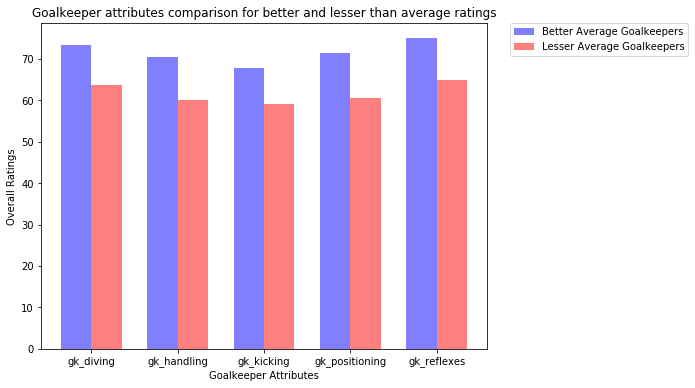

In [31]:
# Setting up the parameters for plotting the dataset comparisons and plotting the multi bar chart

plt.figure(figsize = [8,6]);
heights1 = df_better_goalkeepers.mean()
heights2 = df_lesser_goalkeepers.mean()
ind = np.arange(len(heights1))
width = 0.35

# plot bars
better_gk = plt.bar(ind, heights1, width, color='b', alpha=.5, label='Better Average Goalkeepers')
lesser_avg_gk = plt.bar(ind + width, heights2, width, color='r',alpha = 0.5, label='Lesser Average Goalkeepers')

# title and labels
plt.ylabel('Overall Ratings')
plt.xlabel('Goalkeeper Attributes')
plt.title('Goalkeeper attributes comparison for better and lesser than average ratings')
plt.rcParams['figure.figsize'] = (10,8)

locations = ind + width / 2  # xtick locations
labels = ['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 2, borderaxespad = 0.);